[View in Colaboratory](https://colab.research.google.com/github/ajithvallabai/100-days-of-code/blob/ajithvallabai-patch-1/practise1.ipynb)

In [1]:
import keras

Using TensorFlow backend.


In [0]:
import numpy as np 
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,Add
from keras.layers import Convolution2D,MaxPooling2D
from keras.utils import np_utils 

from keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
print(X_train.shape)

(60000, 28, 28)


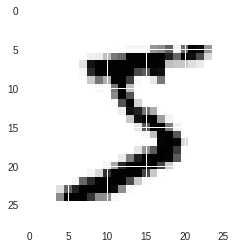

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

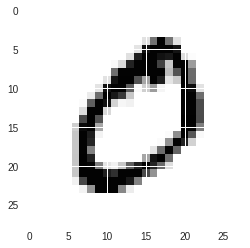

In [6]:
plt.imshow(X_train[1])

In [7]:
X_train.shape[0]

60000

In [8]:
X_train.shape[0]


60000

In [9]:
print("what are you doing")

what are you doing


In [0]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [11]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

In [0]:
Y_train=np_utils.to_categorical(y_train,10)
Y_test=np_utils.to_categorical(y_test,10)

In [14]:
model=Sequential()

model.add(Convolution2D(32,3,3,activation='relu',input_shape=(28,28,1)))
model.add(Dropout(0.4))

model.add(Convolution2D(10,26))
model.add(Flatten())

model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 10)          216330    
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 216,650
Trainable params: 216,650
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
model.fit(X_train,Y_train,batch_size=32,nb_epoch=5,verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/5
60000/60000 [==============================] - 21s 344us/step - loss: 0.2011 - acc: 0.9419
Epoch 2/5
52352/60000 [=========================>....] - ETA: 2s - loss: 0.0869 - acc: 0.9746

60000/60000 [==============================] - 21s 343us/step - loss: 0.0861 - acc: 0.9747
Epoch 3/5
60000/60000 [==============================] - 21s 344us/step - loss: 0.0680 - acc: 0.9791
Epoch 4/5
14208/60000 [======>.......................] - ETA: 15s - loss: 0.0555 - acc: 0.9835

60000/60000 [==============================] - 21s 344us/step - loss: 0.0567 - acc: 0.9823
Epoch 5/5
60000/60000 [==============================] - 21s 343us/step - loss: 0.0448 - acc: 0.9859


In [19]:
score=model.evaluate(X_test,Y_test,verbose=0)
print(score)

[0.06036190749621019, 0.9807]


In [14]:
y_pred=model.predict(X_test)
print(y_pred[:9])
print(y_test[:9])

[[2.2340725e-08 4.5678562e-11 4.7786483e-07 2.1159038e-04 1.2076865e-11
  2.9067340e-09 1.9533226e-15 9.9974352e-01 6.2288991e-06 3.8102015e-05]
 [6.2167646e-06 1.1997256e-06 9.9992883e-01 1.4258701e-06 8.1132974e-13
  1.6827810e-08 6.1475708e-05 8.9868976e-15 8.0425099e-07 6.3457963e-12]
 [6.2804014e-05 9.8769826e-01 1.4214208e-03 8.0406106e-05 3.2117495e-03
  6.7829687e-06 2.0649515e-04 1.0216691e-03 6.2519177e-03 3.8582624e-05]
 [9.9928755e-01 1.2384362e-10 9.5055038e-05 2.3822666e-07 1.9629376e-09
  7.7361130e-07 6.1228545e-04 7.3614137e-07 2.4545847e-07 3.0686540e-06]
 [1.3263327e-06 2.4928490e-09 2.2549514e-07 1.1716193e-06 9.9958211e-01
  3.5001443e-10 7.8067771e-08 5.9089989e-06 3.9268234e-06 4.0520905e-04]
 [1.8249078e-05 9.8408449e-01 3.6098238e-04 6.0099454e-05 2.8871996e-03
  5.9911400e-07 1.3353120e-05 5.9876796e-03 6.5024006e-03 8.4865416e-05]
 [3.7455114e-10 6.8435241e-07 5.5863134e-06 3.2044577e-06 9.5502508e-01
  5.0785484e-06 3.2733897e-08 2.5443989e-05 4.0206630e-02 